In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm #QQ plot

# My Custom Packages
import descriptive_statistics

## baseball game test T- Test
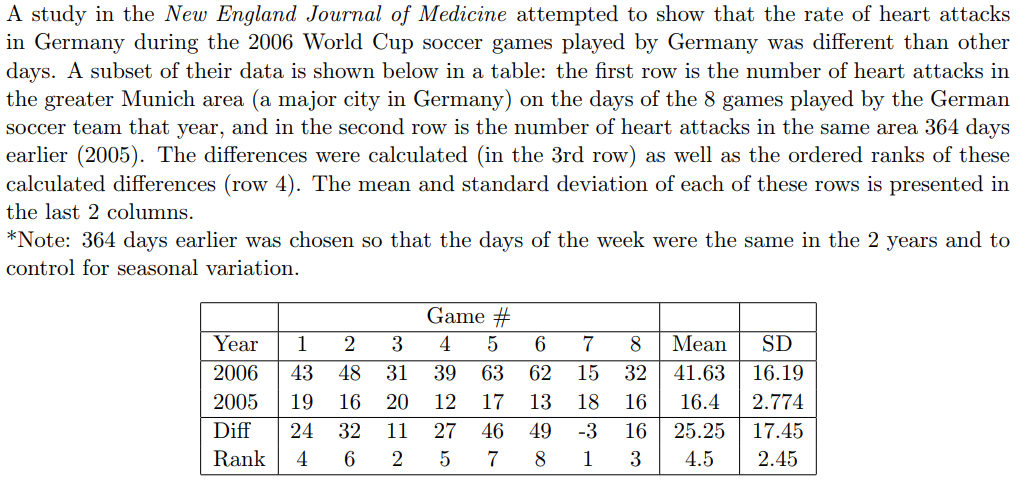

In [107]:
data1 = [43, 48, 31, 39, 63, 62, 15, 32]
data2 = [19, 16, 20, 12, 17, 13, 18, 16]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


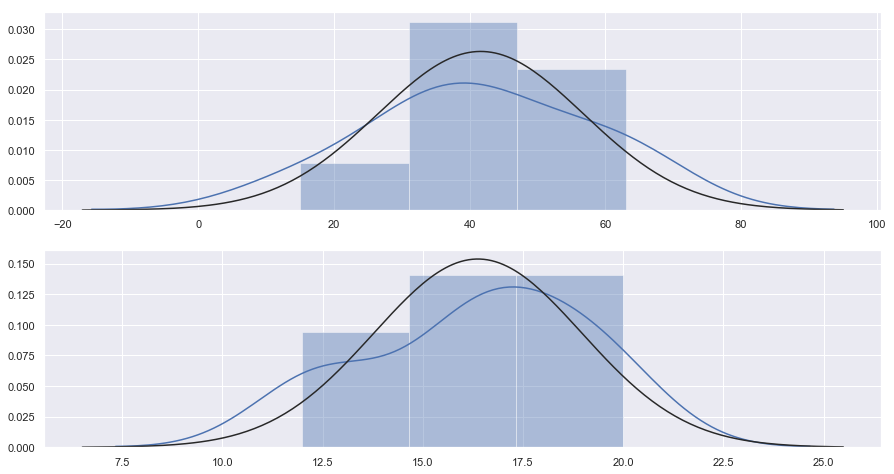

In [108]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,8))
sns.distplot(data1, kde=True, fit=stats.norm, ax = ax1);
sns.distplot(data2, kde=True, fit=stats.norm, ax = ax2);

### T Test by hand (Pair)

In [87]:
data = pd.DataFrame({'data1': (43, 48, 31, 39, 63, 62, 15, 32), 
             'data2': (19, 16, 20, 12, 17, 13, 18, 16)})
data['diff'] = (data.data1 - data.data2)

In [103]:
t = (data.diff.mean() - 0) / (np.std(data.diff) / np.sqrt(len(data.diff)))
print("tvalue: ", t)

tvalue:  4.3753087086553855


### T Test by hand (2 sample)

In [43]:
from scipy import stats

# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
tt = (41.63-16.4)/(np.sqrt(((16.19**2)/8) + ((2.774**2)/8)))
print("T Test Score: ", tt)

#Studnt, n=14, p<0.05, 2-tail
print("T Critical Value: ", stats.t.ppf(1-0.025, 14))

# p value two sided 
pval = stats.t.sf(np.abs(tt), 14)*2
print("p-value: ", pval)


T Test Score:  4.34442472393355
T Critical Value:  2.1447866879169273
p-value:  0.0006731971911374279


#### T Test via Scipy

In [35]:
stat, p = stats.ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4.347, p=0.001
Different distribution (reject H0)


#### Wilconxon Sum

In [33]:
# compare samples
stat, p = stats.wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1.000, p=0.017
Different distribution (reject H0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


----


# ANOVA Problem

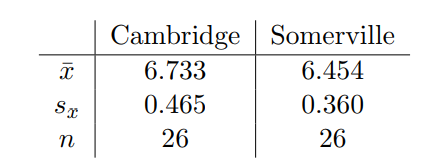
calculate a reasonable 95% confidence interval for the true mean difference

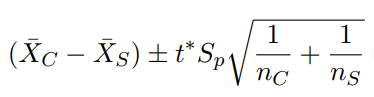

In [147]:
# Two Sample T Test
from scipy import stats

mu_1 = 6.733
s_1 = 0.465
n_1 = 26

mu_2 = 6.454
s_2 = 0.360 
n_2 = 26

df_ = n_1 + n_2 - 2

alpha = 0.05

# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
tt = (mu_1 - mu_2) / (np.sqrt(((s_1**2)/n_1) + ((s_2**2)/n_2)))
print("T Test Score: ", tt)

#Studnt, n=14, p<0.05, 2-tail
t_crit = stats.t.ppf(1-alpha/2, df_)
print("T Critical Value: ", t_crit)

# p value two sided 
pval = stats.t.sf(np.abs(tt), df_)*2
print("p-value: ", pval)

# confidence interval
    ## Pooled Standard Deviaiton
sp = np.sqrt((((n_1-1)*(s_1**2)) + ((n_2-1)*(s_2**2)))/50 ) # pooled variance (ratio of variances is less than 1)
se = sp * np.sqrt((1/n_1 + 1/n_2))

diff_ = mu_1 - mu_2

ci_low = diff_ - (t_crit * se)
ci_high = diff_ + (t_crit * se)
print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

T Test Score:  2.4191493689902672
T Critical Value:  2.008559109715206
p-value:  0.01923727887108601
Confidence Interval from: 0.047 to 0.511


Notice this interval does not contain one: we can thus say that the median housing price is significantly different in the two groups, in fact, the median price is higher in Cmabridge than it is in Somerville